# testing different models for accuracy

In [1]:
#importing libraries
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
import scipy as sp
from joblib import dump
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv("cs1_part3_res.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2913 entries, 0 to 2912
Columns: 229 entries, ms_subclass to sale_condition_Partial
dtypes: float64(38), int64(191)
memory usage: 5.1 MB


# lasso

In [4]:
#Create  and y 
X = df.drop('saleprice',axis=1)
y = df['saleprice']

from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
lasso_model = Lasso()

In [7]:
lasso_model.fit(X_train,y_train)

Lasso()

In [8]:
pred_test_lasso = lasso_model.predict(X_test)

In [9]:
pred_test_lasso

array([12.02626625, 12.02626625, 12.02626625, 12.02626625, 12.02626625,
       12.02626625, 12.02626625, 12.02626625, 12.02626625, 12.02626625,
       12.02626625, 12.02626625, 12.02626625, 12.02626625, 12.02626625,
       12.02626625, 12.02626625, 12.02626625, 12.02626625, 12.02626625,
       12.02626625, 12.02626625, 12.02626625, 12.02626625, 12.02626625,
       12.02626625, 12.02626625, 12.02626625, 12.02626625, 12.02626625,
       12.02626625, 12.02626625, 12.02626625, 12.02626625, 12.02626625,
       12.02626625, 12.02626625, 12.02626625, 12.02626625, 12.02626625,
       12.02626625, 12.02626625, 12.02626625, 12.02626625, 12.02626625,
       12.02626625, 12.02626625, 12.02626625, 12.02626625, 12.02626625,
       12.02626625, 12.02626625, 12.02626625, 12.02626625, 12.02626625,
       12.02626625, 12.02626625, 12.02626625, 12.02626625, 12.02626625,
       12.02626625, 12.02626625, 12.02626625, 12.02626625, 12.02626625,
       12.02626625, 12.02626625, 12.02626625, 12.02626625, 12.02

In [10]:
MAE_Lasso = mean_absolute_error(y_test,pred_test_lasso)
MSE_Lasso = mean_squared_error(y_test,pred_test_lasso)
RMSE_Lasso = np.sqrt(MSE_Lasso)

In [11]:
MAE_Lasso

0.3162979454294107

In [12]:
MSE_Lasso

0.16470874058050147

In [13]:
RMSE_Lasso

0.4058432463162366

In [14]:
def MAPE(y_test,pred_test_lasso):
    mape = np.mean(np.abs((y_test - pred_test_lasso)/y_test))*100
    return mape

In [15]:
LR_MAPElasso= MAPE(y_test,pred_test_lasso)

In [16]:
print("lassocv MAPE: ",LR_MAPElasso)

lassocv MAPE:  2.644988975775431


In [17]:
accuracy1= round(r2_score(y_test, pred_test_lasso), 2)
accuracy1= accuracy1 * 100
accuracy1

-1.0

# lasso cv

In [18]:
#Create  and y 
X = df.drop('saleprice',axis=1)
y = df['saleprice']

from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
lasso_model = LassoCV()

In [21]:
lasso_model.fit(X_train,y_train)

LassoCV()

In [22]:
pred_test_lasso = lasso_model.predict(X_test)

In [23]:
pred_test_lasso

array([12.43756407, 12.00382666, 12.57593385, 11.69364772, 12.15445921,
       12.00575682, 11.65642372, 12.26934075, 12.00283799, 11.44749811,
       11.42524491, 11.59789482, 11.77070495, 11.93852837, 11.96670934,
       11.22374523, 11.29014248, 12.1092276 , 11.79572251, 12.16137819,
       11.25410985, 12.42437895, 12.12044388, 11.52167978, 11.6026842 ,
       11.75546727, 11.92791007, 12.34633587, 12.22611646, 12.18418464,
       11.78883306, 11.86320868, 12.69987711, 12.64990387, 11.27257632,
       12.05186896, 11.43418674, 11.72856218, 11.87144459, 11.45980792,
       12.14435614, 12.72319103, 11.77805402, 12.36069025, 12.01598966,
       11.63708379, 10.97085701, 11.16776793, 11.79115182, 12.73202008,
       11.95699271, 12.08043511, 12.15655872, 12.12487187, 11.4665605 ,
       12.31448163, 12.45370558, 11.7897481 , 12.13422821, 12.04192818,
       11.70424136, 11.85914235, 12.10676117, 12.64267555, 12.03237135,
       12.02551612, 11.58324871, 12.4983173 , 11.51306757, 11.72

In [24]:
MAE_Lasso = mean_absolute_error(y_test,pred_test_lasso)
MSE_Lasso = mean_squared_error(y_test,pred_test_lasso)
RMSE_Lasso = np.sqrt(MSE_Lasso)

In [25]:
MAE_Lasso

0.0781086312847074

In [26]:
MSE_Lasso

0.011706586855578512

In [27]:
RMSE_Lasso

0.10819698173044622

In [28]:
def MAPE(y_test,pred_test_lasso):
    mape = np.mean(np.abs((y_test - pred_test_lasso)/y_test))*100
    return mape

In [29]:
LR_MAPElassocv= MAPE(y_test,pred_test_lasso)

In [30]:
print("lassocv MAPE: ",LR_MAPElassocv)

lassocv MAPE:  0.6559918525235781


In [31]:
print("Best alpha using built-in LassoCV: %f" % lasso_model.alpha_)
print("Best score using built-in LassoCV: %f" %lasso_model.score(X,y))
coef = pd.Series(lasso_model.coef_, index = X.columns)

Best alpha using built-in LassoCV: 0.002171
Best score using built-in LassoCV: -2461388.826797


In [32]:
test_pred=y_test-pred_test_lasso

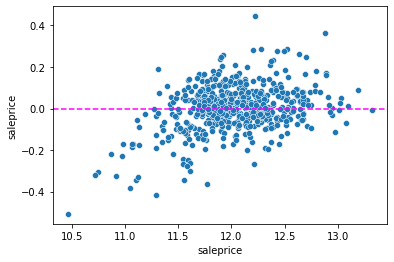

In [33]:
sns.scatterplot(x=y_test,y=test_pred)
plt.axhline(y=0,color='magenta',linestyle='--')

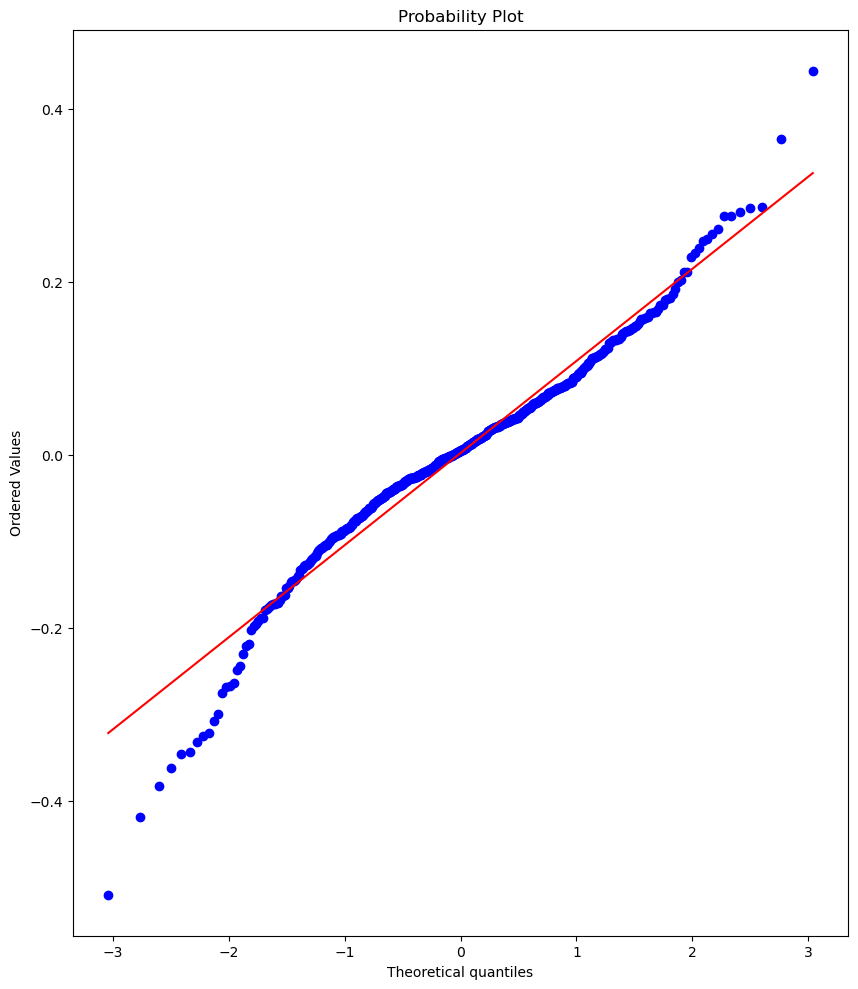

In [34]:
fig,ax = plt.subplots(figsize=(10,12),dpi=100)

_=sp.stats.probplot(test_pred,plot=ax)

In [35]:
100*RMSE_Lasso/df['saleprice'].mean()

0.9001159005478638

In [36]:
accuracy2= round(r2_score(y_test, pred_test_lasso), 2)
accuracy2= accuracy2 * 100
accuracy2

93.0

# linear regression

In [37]:
#Create  and y 
X = df.drop('saleprice',axis=1)
y = df['saleprice']

from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [39]:
linear_model = LinearRegression()

In [40]:
linear_model.fit(X_train,y_train)

LinearRegression()

In [41]:
pred_linear_model = linear_model.predict(X_test)

In [42]:
pred_linear_model

array([ 1.20610862e+01,  1.15803094e+01,  1.07495176e+01,  1.17165214e+01,
        1.26159484e+01,  1.18255562e+01,  1.18689838e+01,  1.20637677e+01,
        1.18734963e+01,  1.14045359e+01,  1.18187916e+01,  1.20090609e+01,
        1.20460994e+01,  1.24639474e+01,  1.20483692e+01,  1.11086158e+01,
        1.18527196e+01,  1.22809336e+01,  1.18706436e+01,  1.23389467e+01,
        1.18148284e+01,  1.19760292e+01,  1.21230525e+01,  1.20046961e+01,
        1.18931245e+01,  1.28868807e+01,  1.15319792e+01,  1.15103912e+01,
        1.20071086e+01,  1.27273250e+01,  1.20911121e+01,  1.18670268e+01,
        1.19520404e+01,  1.27256451e+01,  1.28652918e+01,  1.16317270e+01,
        1.20649515e+01,  1.20993191e+01,  1.18372570e+01,  1.24840705e+01,
        1.23982974e+01,  1.20431867e+01,  1.21745594e+01,  1.18888100e+01,
        1.20065343e+01,  1.16667305e+01,  1.19525452e+01,  1.22740762e+01,
        1.16245879e+01,  1.23605287e+01,  1.18372796e+01,  1.23121736e+01,
        1.18523736e+01,  

In [43]:
MAE_Lr = mean_absolute_error(y_test,pred_linear_model)
MSE_Lr = mean_squared_error(y_test,pred_linear_model)
RMSE_Lr = np.sqrt(MSE_Lr)

In [44]:
MAE_Lr

125829414.11197937

In [45]:
MSE_Lr

3.6923750184361103e+18

In [46]:
RMSE_Lr

1921555364.3952365

In [47]:
def MAPE(y_test,pred_linear_model):
    mape = np.mean(np.abs((y_test - pred_linear_model)/y_test))*100
    return mape

In [48]:
LR_MAPE= MAPE(y_test,pred_linear_model)

In [49]:
print("MAPE: ",LR_MAPE)

MAPE:  1036780378.2862743


In [50]:
#print("Best alpha using built-in LassoCV: %f" % linear_model.alpha_)
print("Best score using built-in LassoCV: %f" %linear_model.score(X,y))
coef = pd.Series(linear_model.coef_, index = X.columns)

Best score using built-in LassoCV: -509173166031236501602304.000000


In [51]:
test_pred=y_test-pred_linear_model

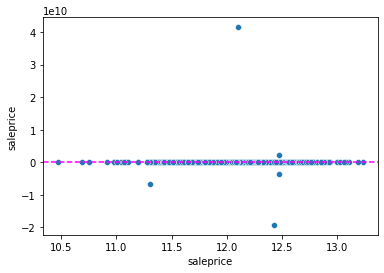

In [52]:
sns.scatterplot(x=y_test,y=test_pred)
plt.axhline(y=0,color='magenta',linestyle='--')

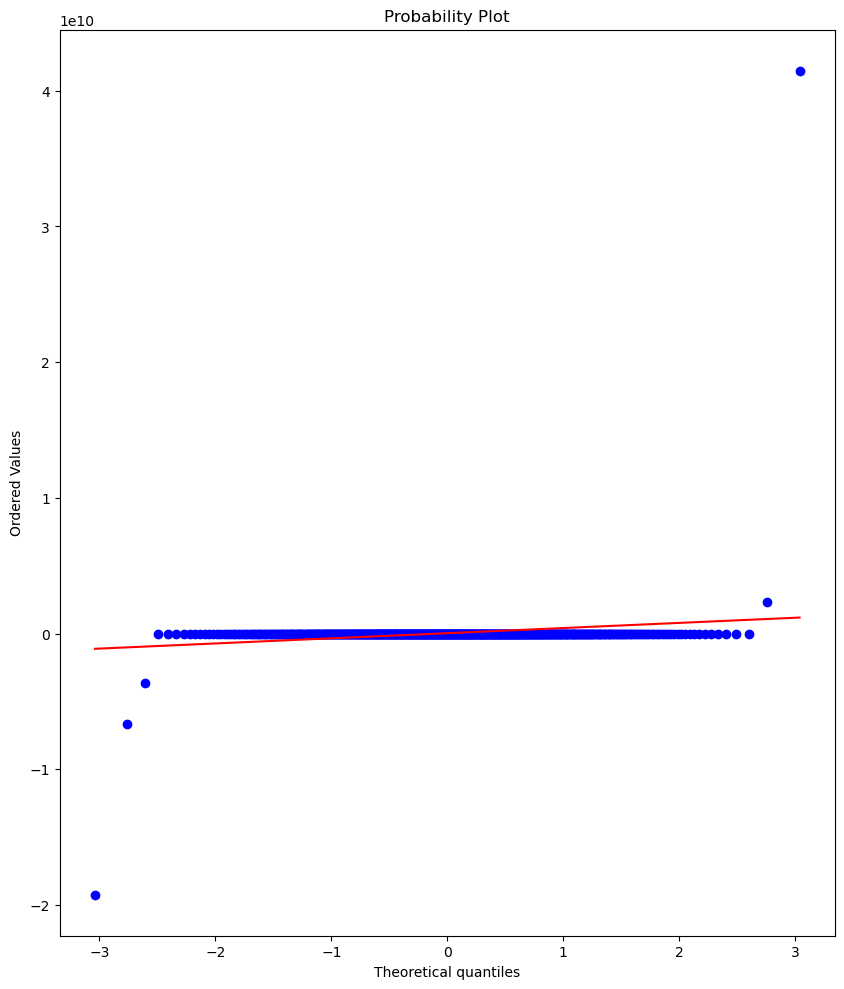

In [53]:
fig,ax = plt.subplots(figsize=(10,12),dpi=100)

_=sp.stats.probplot(test_pred,plot=ax)

In [54]:
accuracy3= round(r2_score(y_test, pred_linear_model), 2)
accuracy3= accuracy3 * 100
accuracy3

-2.2991411294225558e+21

# Grid search with elastic cv

In [55]:
#Create  and y 
X = df.drop('saleprice',axis=1)
y = df['saleprice']

from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [56]:
#base_elastic_model = ElasticNet(max_iter=250000)
base_elastic_model = ElasticNet()

In [57]:
param_grid = {'alpha':[0.1,1,10,50,100],'l1_ratio':[0.1,0.5,0.7,0.9,1]}

In [58]:
#grid_model = GridSearchCV(estimator=base_elastic_model,param_grid=param_grid,scoring='neg_mean_squared_error',cv=10,verbose=2)
grid_model = GridSearchCV(estimator=base_elastic_model,param_grid=param_grid,scoring='neg_mean_squared_error',cv=10,verbose=2)

In [59]:
grid_model.fit(X_train,y_train)

Fitting 10 folds for each of 25 candidates, totalling 250 fits
[CV] alpha=0.1, l1_ratio=0.1 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.1, total=   0.1s
[CV] alpha=0.1, l1_ratio=0.1 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.1, total=   0.1s
[CV] alpha=0.1, l1_ratio=0.1 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.1, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.1 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.1, total=   0.0s

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] alpha=0.1, l1_ratio=0.1 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.1, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.1 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.1, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.1 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.1, total=   0.1s
[CV] alpha=0.1, l1_ratio=0.1 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.1, total=   0.1s
[CV] alpha=0.1, l1_ratio=0.1 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.1, total=   0.1s
[CV] alpha=0.1, l1_ratio=0.1 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.1, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.5 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.5, total=   0.0s
[CV] 

[CV] ............................ alpha=1, l1_ratio=0.5, total=   0.0s
[CV] alpha=1, l1_ratio=0.5 ...........................................
[CV] ............................ alpha=1, l1_ratio=0.5, total=   0.0s
[CV] alpha=1, l1_ratio=0.5 ...........................................
[CV] ............................ alpha=1, l1_ratio=0.5, total=   0.0s
[CV] alpha=1, l1_ratio=0.5 ...........................................
[CV] ............................ alpha=1, l1_ratio=0.5, total=   0.0s
[CV] alpha=1, l1_ratio=0.5 ...........................................
[CV] ............................ alpha=1, l1_ratio=0.5, total=   0.0s
[CV] alpha=1, l1_ratio=0.7 ...........................................
[CV] ............................ alpha=1, l1_ratio=0.7, total=   0.0s
[CV] alpha=1, l1_ratio=0.7 ...........................................
[CV] ............................ alpha=1, l1_ratio=0.7, total=   0.0s
[CV] alpha=1, l1_ratio=0.7 ...........................................
[CV] .

[CV] ........................... alpha=10, l1_ratio=0.7, total=   0.0s
[CV] alpha=10, l1_ratio=0.7 ..........................................
[CV] ........................... alpha=10, l1_ratio=0.7, total=   0.0s
[CV] alpha=10, l1_ratio=0.9 ..........................................
[CV] ........................... alpha=10, l1_ratio=0.9, total=   0.0s
[CV] alpha=10, l1_ratio=0.9 ..........................................
[CV] ........................... alpha=10, l1_ratio=0.9, total=   0.0s
[CV] alpha=10, l1_ratio=0.9 ..........................................
[CV] ........................... alpha=10, l1_ratio=0.9, total=   0.0s
[CV] alpha=10, l1_ratio=0.9 ..........................................
[CV] ........................... alpha=10, l1_ratio=0.9, total=   0.0s
[CV] alpha=10, l1_ratio=0.9 ..........................................
[CV] ........................... alpha=10, l1_ratio=0.9, total=   0.0s
[CV] alpha=10, l1_ratio=0.9 ..........................................
[CV] .

[CV] ........................... alpha=50, l1_ratio=0.9, total=   0.0s
[CV] alpha=50, l1_ratio=0.9 ..........................................
[CV] ........................... alpha=50, l1_ratio=0.9, total=   0.1s
[CV] alpha=50, l1_ratio=0.9 ..........................................
[CV] ........................... alpha=50, l1_ratio=0.9, total=   0.0s
[CV] alpha=50, l1_ratio=0.9 ..........................................
[CV] ........................... alpha=50, l1_ratio=0.9, total=   0.0s
[CV] alpha=50, l1_ratio=1 ............................................
[CV] ............................. alpha=50, l1_ratio=1, total=   0.0s
[CV] alpha=50, l1_ratio=1 ............................................
[CV] ............................. alpha=50, l1_ratio=1, total=   0.1s
[CV] alpha=50, l1_ratio=1 ............................................
[CV] ............................. alpha=50, l1_ratio=1, total=   0.0s
[CV] alpha=50, l1_ratio=1 ............................................
[CV] .

[CV] ............................ alpha=100, l1_ratio=1, total=   0.0s
[CV] alpha=100, l1_ratio=1 ...........................................
[CV] ............................ alpha=100, l1_ratio=1, total=   0.0s
[CV] alpha=100, l1_ratio=1 ...........................................
[CV] ............................ alpha=100, l1_ratio=1, total=   0.0s
[CV] alpha=100, l1_ratio=1 ...........................................
[CV] ............................ alpha=100, l1_ratio=1, total=   0.0s


[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    8.2s finished


GridSearchCV(cv=10, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 1, 10, 50, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 1]},
             scoring='neg_mean_squared_error', verbose=2)

In [60]:
grid_model.best_params_

{'alpha': 0.1, 'l1_ratio': 0.1}

In [61]:
grid_model.best_estimator_

ElasticNet(alpha=0.1, l1_ratio=0.1)

In [62]:
y_pred = grid_model.predict(X_test)

In [63]:
mean_squared_error(y_test,y_pred)

0.011960979403844907

In [64]:
RMSE = np.sqrt(mean_squared_error(y_test,y_pred))
RMSE

0.10936626264001575

In [65]:
test_prob = y_test - y_pred

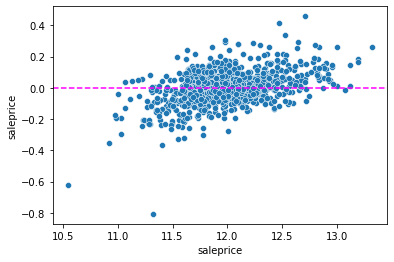

In [66]:
sns.scatterplot(x=y_test,y=test_prob)
plt.axhline(y=0,color='magenta',linestyle='--')

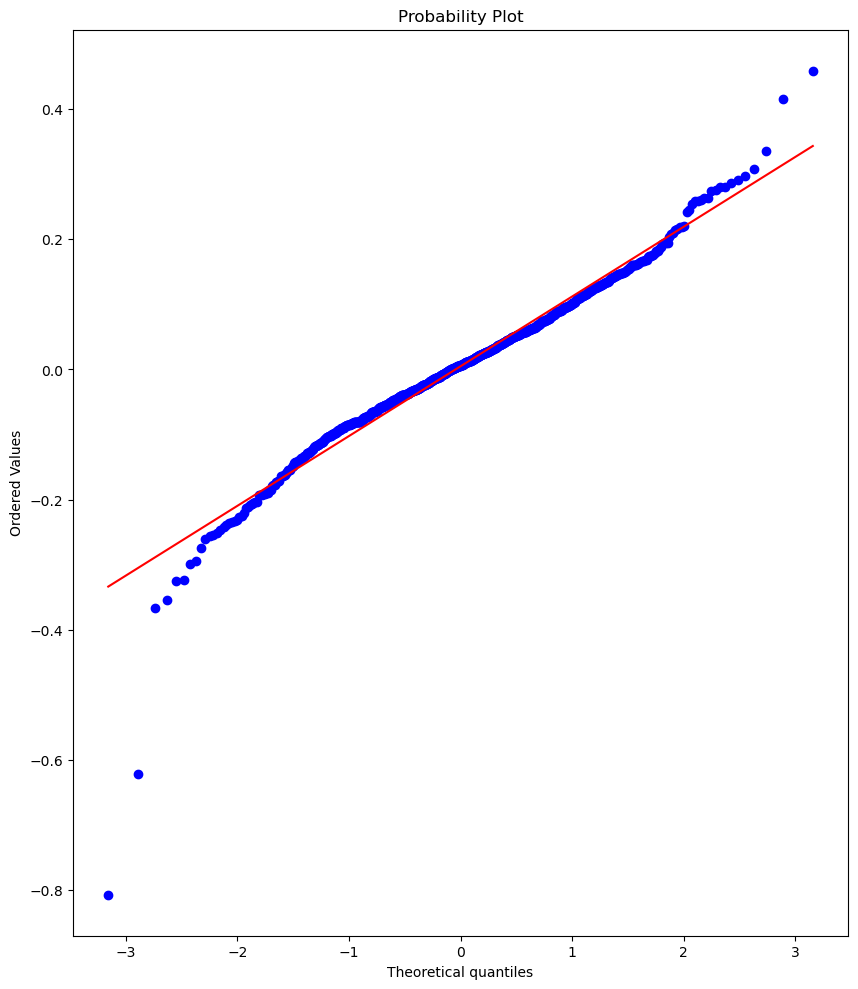

In [67]:
fig,ax = plt.subplots(figsize=(10,12),dpi=100)

_=sp.stats.probplot(test_prob,plot=ax)

In [68]:
def MAPE(y_test,y_pred):
    mape = np.mean(np.abs((y_test - y_pred)/y_test))*100
    return mape

In [69]:
LR_MAPEgrid= MAPE(y_test,y_pred)

In [70]:
print("MAPE: ",LR_MAPEgrid)

MAPE:  0.6712208538019672


In [71]:
accuracy4= round(r2_score(y_test, y_pred), 2)
accuracy4= accuracy4 * 100
accuracy4

92.0

# Ridge model

In [72]:
#Create  and y 
X = df.drop('saleprice',axis=1)
y = df['saleprice']

from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [73]:
ridge_model = Ridge(alpha=10)

In [74]:
ridge_model.fit(X_train,y_train)

Ridge(alpha=10)

In [75]:
pred_test_ridge = ridge_model.predict(X_test)

In [76]:
pred_test_ridge

array([12.1604867 , 11.7616209 , 12.23461555, 11.57075426, 11.83873449,
       11.67921654, 12.62630553, 12.08181875, 12.61384153, 12.4780085 ,
       11.26176333, 11.38480061, 12.73033991, 11.59089243, 11.40413281,
       12.29583172, 12.02527213, 11.41691313, 11.63162074, 12.26449864,
       12.61553607, 12.23266576, 12.11904848, 11.68127396, 10.82600297,
       12.41181093, 12.46371111, 11.90758166, 12.78878167, 12.40279789,
       12.45741259, 11.97654408, 12.39252529, 12.63083646, 12.04020196,
       11.93088753, 11.92159744, 11.85311138, 12.25381595, 11.71782512,
       11.70756841, 11.75108006, 11.80198704, 12.14751066, 11.85996839,
       12.29683254, 12.21173497, 12.17205307, 12.03958856, 12.69358762,
       12.06712331, 12.13706992, 12.28079885, 11.63691024, 12.66059063,
       12.61024762, 11.88100835, 11.83047531, 11.6676893 , 11.9009177 ,
       12.59992631, 11.53324634, 12.61356198, 12.1658153 , 11.66168756,
       11.8321812 , 11.75765799, 11.87262009, 11.9912063 , 12.14

In [77]:
MAE_ridge = mean_absolute_error(y_test,pred_test_ridge)
MSE_ridge = mean_squared_error(y_test,pred_test_ridge)
RMSE_ridge = np.sqrt(MSE_ridge)

In [78]:
MAE_ridge

0.07984504261033595

In [79]:
MSE_ridge

0.013143063671958196

In [80]:
RMSE_ridge

0.11464320159502785

In [81]:
def MAPE(y_test,pred_test_ridge):
    mape = np.mean(np.abs((y_test - pred_test_ridge)/y_test))*100
    return mape

In [82]:
LR_MAPEridge= MAPE(y_test,pred_test_ridge)

In [83]:
print("MAPE: ",LR_MAPEridge)

MAPE:  0.6680567802220602


In [124]:
test_pred=y_test-pred_test_ridge

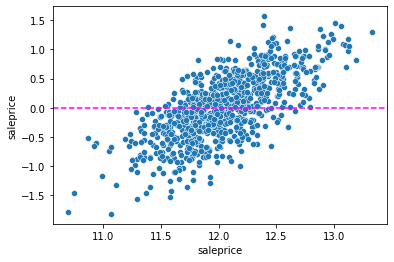

In [127]:
sns.scatterplot(x=y_test,y=test_pred)
plt.axhline(y=0,color='magenta',linestyle='--')

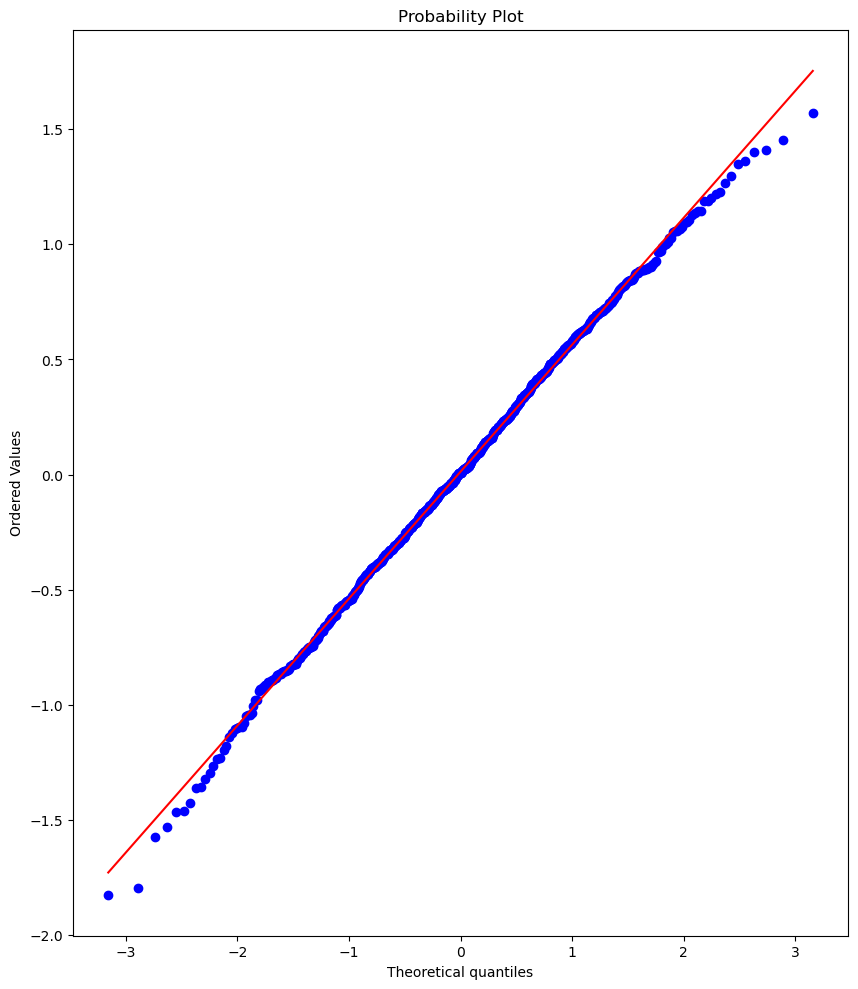

In [128]:
fig,ax = plt.subplots(figsize=(10,12),dpi=100)

_=sp.stats.probplot(test_pred,plot=ax)

In [131]:
accuracy5= round(r2_score(y_test, pred_test_ridge), 2)
accuracy5= accuracy5 * 100
accuracy5

-94.0

# elastic model

In [87]:
#Create  and y 
X = df.drop('saleprice',axis=1)
y = df['saleprice']

from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [88]:
elastic_model = ElasticNet()

In [89]:
elastic_model.fit(X_train,y_train)

ElasticNet()

In [90]:
pred_test_elastic = elastic_model.predict(X_test)

In [91]:
pred_test_elastic

array([12.02209928, 12.02209928, 12.02209928, 12.02209928, 12.02209928,
       12.02209928, 12.02209928, 12.02209928, 12.02209928, 12.02209928,
       12.02209928, 12.02209928, 12.02209928, 12.02209928, 12.02209928,
       12.02209928, 12.02209928, 12.02209928, 12.02209928, 12.02209928,
       12.02209928, 12.02209928, 12.02209928, 12.02209928, 12.02209928,
       12.02209928, 12.02209928, 12.02209928, 12.02209928, 12.02209928,
       12.02209928, 12.02209928, 12.02209928, 12.02209928, 12.02209928,
       12.02209928, 12.02209928, 12.02209928, 12.02209928, 12.02209928,
       12.02209928, 12.02209928, 12.02209928, 12.02209928, 12.02209928,
       12.02209928, 12.02209928, 12.02209928, 12.02209928, 12.02209928,
       12.02209928, 12.02209928, 12.02209928, 12.02209928, 12.02209928,
       12.02209928, 12.02209928, 12.02209928, 12.02209928, 12.02209928,
       12.02209928, 12.02209928, 12.02209928, 12.02209928, 12.02209928,
       12.02209928, 12.02209928, 12.02209928, 12.02209928, 12.02

In [92]:
MAE_elastic = mean_absolute_error(y_test,pred_test_elastic)
MSE_elastic = mean_squared_error(y_test,pred_test_elastic)
RMSE_elastic = np.sqrt(MSE_ridge)

In [93]:
MAE_elastic

0.30226368508685725

In [94]:
MSE_elastic

0.15219416287369159

In [95]:
RMSE_elastic

0.11464320159502785

In [96]:
def MAPE(y_test,pred_test_elastic):
    mape = np.mean(np.abs((y_test - pred_test_elastic)/y_test))*100
    return mape

In [97]:
LR_MAPEelastic= MAPE(y_test,pred_test_elastic)

In [98]:
print("MAPE: ",LR_MAPEelastic)

MAPE:  2.5148886276035514


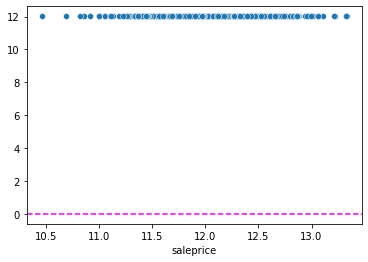

In [99]:
sns.scatterplot(x=y_test,y=pred_test_elastic)
plt.axhline(y=0,color='magenta',linestyle='--')

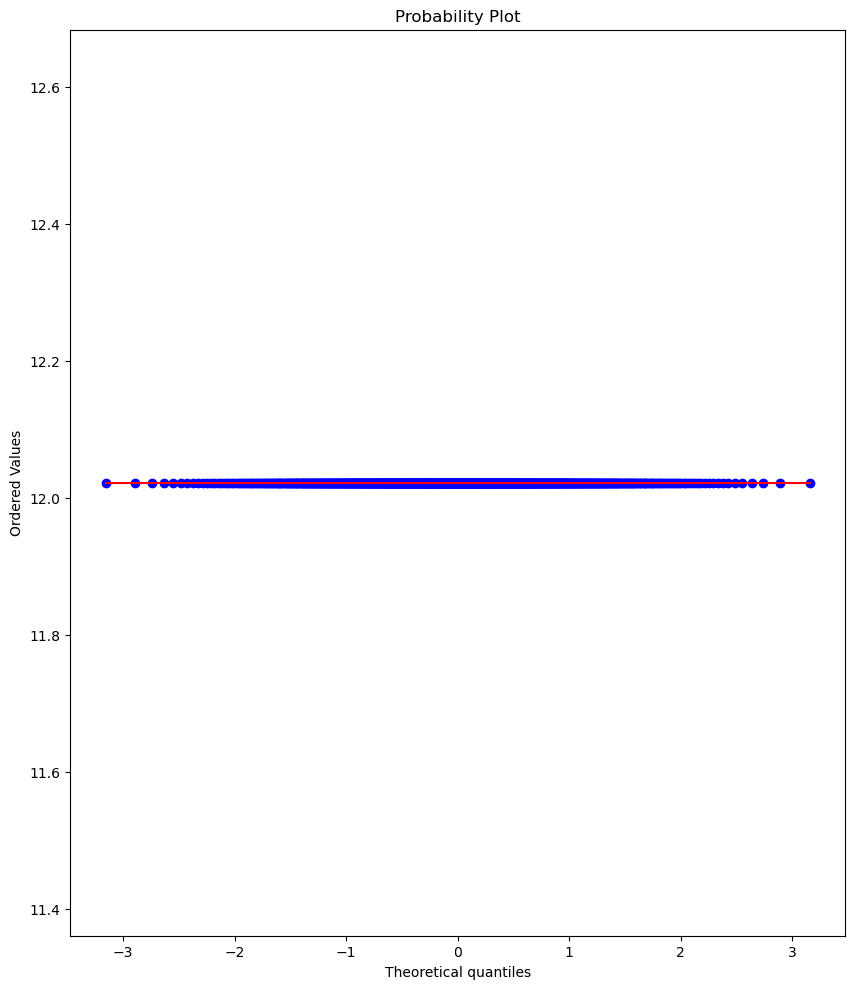

In [100]:
fig,ax = plt.subplots(figsize=(10,12),dpi=100)

_=sp.stats.probplot(pred_test_elastic,plot=ax)

In [101]:
accuracy6= round(r2_score(y_test, pred_test_elastic), 2)
accuracy6= accuracy6 * 100
accuracy6

-0.0

# ridge cv

In [102]:
#Create  and y 
X = df.drop('saleprice',axis=1)
y = df['saleprice']

from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [103]:
ridgecv_model = RidgeCV()

In [104]:
ridgecv_model.fit(X_train,y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]))

In [105]:
pred_test_ridgecv = ridgecv_model.predict(X_test)

In [106]:
pred_test_ridgecv

array([12.04293657, 12.47158867, 12.04211672, 12.22668538, 11.89803504,
       11.46198932, 12.03538912, 11.81339866, 12.465064  , 11.25208302,
       11.83031721, 11.28466642, 11.67041259, 12.51382328, 11.85470917,
       12.2970524 , 11.66390922, 11.53509782, 12.07107032, 11.87313712,
       12.68840236, 12.32299721, 12.38554919, 11.80250061, 12.30511777,
       12.33980619, 11.6386765 , 11.76839197, 12.80427405, 11.71558632,
       12.1704038 , 12.30026647, 11.77533787, 11.74718866, 12.27889172,
       11.71761578, 12.34230845, 12.15039405, 11.30280996, 11.67446377,
       12.56876022, 12.51320366, 11.89346835, 11.90087458, 12.17316788,
       11.64536491, 11.92232198, 11.34876836, 12.42456769, 11.93109618,
       12.52086078, 11.82320163, 12.68074782, 11.92955769, 11.97071078,
       12.43661594, 11.88815861, 11.72510146, 11.68228699, 12.51629604,
       11.83317143, 12.20766152, 12.11288076, 12.21434346, 12.0523773 ,
       12.14129009, 12.14164016, 11.72692171, 12.54341313, 12.49

In [107]:
MAE_ridgecv = mean_absolute_error(y_test,pred_test_ridgecv)
MSE_ridgecv = mean_squared_error(y_test,pred_test_ridgecv)
RMSE_ridgecv = np.sqrt(MSE_ridge)

In [108]:
MAE_ridgecv

0.0777301588063357

In [109]:
MSE_ridgecv 

0.011817268880913298

In [110]:
RMSE_ridgecv 

0.11464320159502785

In [111]:
def MAPE(y_test,pred_test_ridgecv):
    mape = np.mean(np.abs((y_test - pred_test_elastic)/y_test))*100
    return mape

In [112]:
LR_MAPEridgecv= MAPE(y_test,pred_test_ridgecv)

In [113]:
print("MAPE: ",LR_MAPEridgecv)

MAPE:  2.58593982185818


In [132]:
test_pred=y_test-pred_test_ridgecv

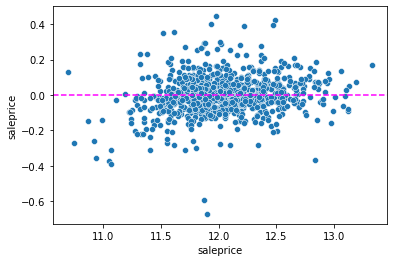

In [133]:
sns.scatterplot(x=y_test,y=test_pred)
plt.axhline(y=0,color='magenta',linestyle='--')

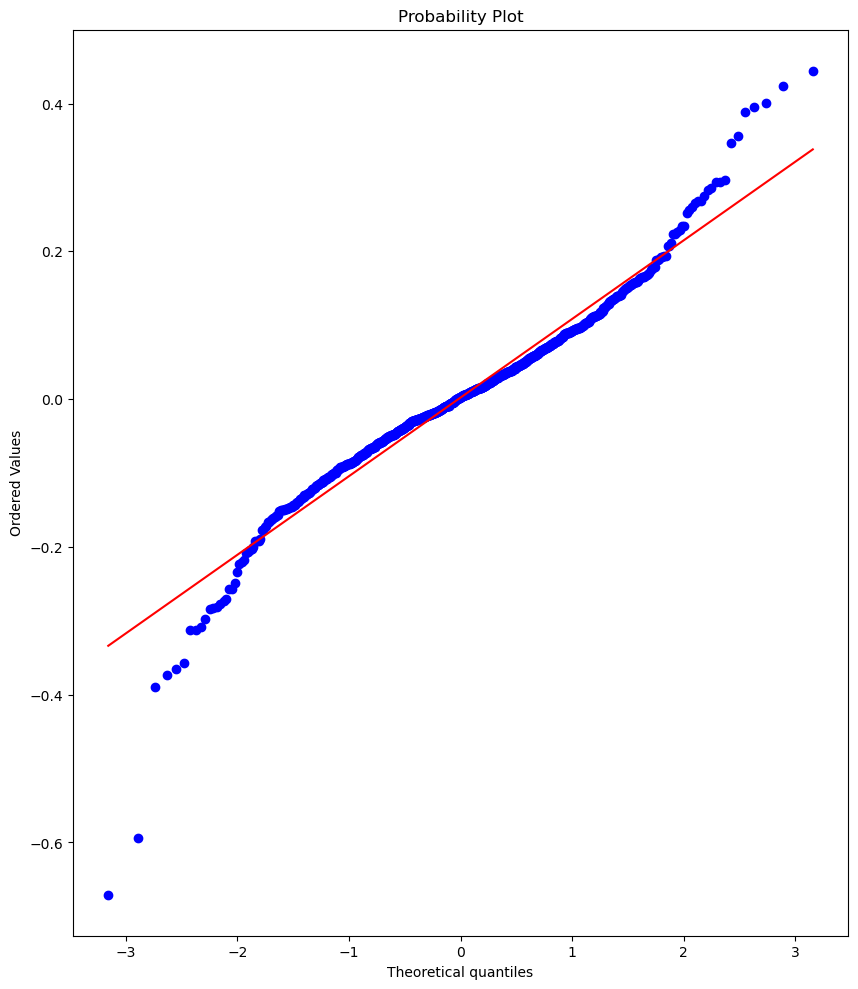

In [134]:
fig,ax = plt.subplots(figsize=(10,12),dpi=100)

_=sp.stats.probplot(test_pred,plot=ax)

In [135]:
accuracy7= round(r2_score(y_test, pred_test_ridgecv), 2)
accuracy7= accuracy7 * 100
accuracy7

92.0

In [117]:
print("lasso: ",LR_MAPElasso, "accuracy: ",accuracy1)

lasso:  2.644988975775431 accuracy:  -1.0


In [118]:
print("lasso cv: \t",LR_MAPElassocv, "accuracy: ",accuracy2)

lasso cv: 	 0.6559918525235781 accuracy:  93.0


In [119]:
print("Linear regression\t",LR_MAPE, "accuracy: ",accuracy3)


Linear regression	 1036780378.2862743 accuracy:  -2.2991411294225558e+21


In [120]:
print("Gridcv with elastic :\t",LR_MAPEgrid, "accuracy: ",accuracy4)


Gridcv with elastic :	 0.6712208538019672 accuracy:  92.0


In [121]:
print("ridge :\t",LR_MAPEridge, "accuracy: ",accuracy5)


ridge :	 0.6680567802220602 accuracy:  92.0


In [122]:
print("elastic :\t",LR_MAPEelastic, "accuracy: ",accuracy6)


elastic :	 2.5148886276035514 accuracy:  -0.0


In [123]:
print("ridge cv: \t",LR_MAPEridgecv, "accuracy: ",accuracy7)

ridge cv: 	 2.58593982185818 accuracy:  92.0
